In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import CubicHermiteSpline

In [2]:
class CubicInterpolate:
	def __init__(self, coords, guid_vec):
		self.x = coords[:, 0]
		self.y = coords[:, 1]
		self.guid_vec = guid_vec
		self.HermiteMatrix = np.array([
			[1, 0, 0, 0],
			[0, 0, 1, 0],
			[-3, 3, -2, -1],
			[2, -2, 1, 1],
		])
		self.p = np.array([
			self.HermiteMatrix @  np.append(self.x, self.guid_vec[:, 0]),
			self.HermiteMatrix @  np.append(self.y, self.guid_vec[:, 1]),
		])
	
	def draw_coords(self):
		u = np.linspace(0, 1, 1000)
		x, y = self.p

		return np.array([
			x[0] + x[1] * u + x[2] * u ** 2 + x[3] * u ** 3,
			y[0] + y[1] * u + y[2] * u ** 2 + y[3] * u ** 3,
		])

In [3]:
a = CubicInterpolate(
	np.array([
		[1, 1],
		[3, 1]
	]),
	np.array([
		[0, 1],
		[0, -1]
	])
)

b = CubicInterpolate(
	np.array([
		[3, 1],
		[7, 1]
	]),
	np.array([
		[0, -1],
		[1, 1]
	])
)

c = CubicInterpolate(
	np.array([
		[7, 1],
		[5, 2]
	]),
	np.array([
		[1, 2],
		[1, 3]
	])
)

In [4]:
def draw_interpolation(*args):
	for v in args:
		plt.scatter(v.x, v.y, s=50, color="#069AF3", ec="black", zorder=3)
		plt.plot(*v.draw_coords(), color="r")
	
	plt.grid()
	plt.show()

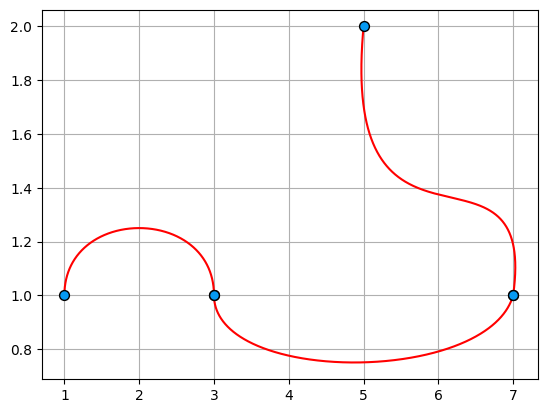

In [5]:
draw_interpolation(a, b, c)

In [6]:
import pandas as pd

df = pd.read_csv("nan_data.csv")
df

,x1,x2,x3,y
0,42.0,92.0,28.0,1128
1,32.0,9.0,67.0,1301
2,46.0,59.0,94.0,1350
3,96.0,85.0,40.0,1315
4,10.0,20.0,1.0,1011
...,...,...,...,...
95,16.0,65.0,52.0,1127
96,78.0,45.0,NaN,1268
97,4.0,87.0,93.0,1207
98,63.0,89.0,23.0,1184


In [7]:
df.isnull().sum()

x1    3
x2    4
x3    3
y     0
dtype: int64

In [8]:
def interpolate_nan_hermite(column):
    mask = ~column.isna()

    x = np.arange(len(column))[mask]
    y = column[mask].values
    dy = df["y"].to_numpy()[mask]
    cs = CubicHermiteSpline(x, y, dy)
    x_all = np.arange(len(column))
    interpolated = cs(x_all)
    result = column.copy()
    result[~mask] = interpolated[~mask]
    return result

print(df.isna().sum())

for col in ["x1", "x2", "x3"]:
    if df[col].isna().any():
        df[col] = interpolate_nan_hermite(df[col])

print(df.isna().sum())

x1    3
x2    4
x3    3
y     0
dtype: int64
x1    0
x2    0
x3    0
y     0
dtype: int64


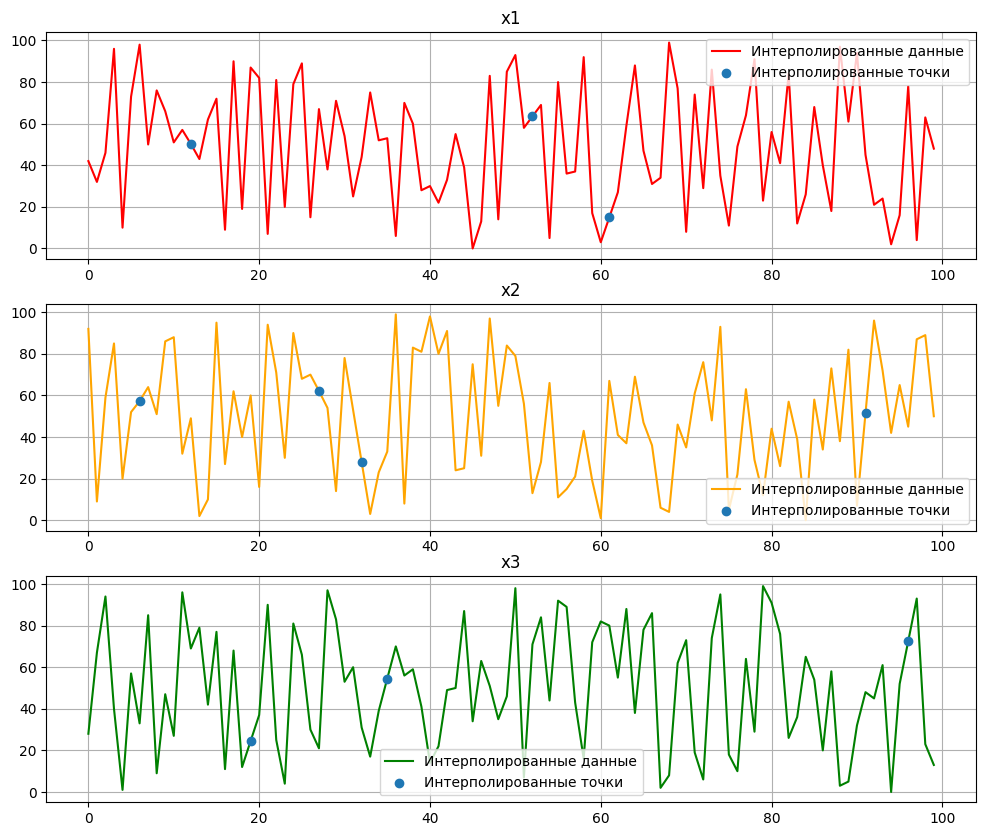

In [9]:
df = pd.read_csv("nan_data.csv")

def interpolate_nan_hermite(column):
    mask = ~column.isna()

    x = np.arange(len(column))[mask]
    y = column[mask].values
    # dy = df["y"].to_numpy()[mask]
    dy = np.gradient(x, y)
    cs = CubicHermiteSpline(x, y, dy)
    x_all = np.arange(len(column))
    interpolated = cs(x_all)
    result = column.copy()
    result[~mask] = interpolated[~mask]
    return result, mask

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

colors = ["red", "orange", "green"]

for i, col in enumerate(["x1", "x2", "x3"]):
    if df[col].isna().any():
        df[col], mask = interpolate_nan_hermite(df[col])

        ax[i].plot(np.arange(len(df)), df[col], color=colors[i], label="Интерполированные данные")
        ax[i].scatter(np.arange(len(df))[~mask], df[col][~mask], label="Интерполированные точки", zorder=3)

        ax[i].set_title(f"{col}")
        ax[i].legend()
        ax[i].grid()

plt.show()

In [10]:
df2 = pd.read_csv("nan_data.csv")
data = df.iloc
data2 = df2.iloc
for i in range(len(df2)):
    if np.isnan(data2[i]).any():
        print(data2[i].name, data2[i].values, data[i].name, data[i].values)

6 [  98.   nan   33. 1380.] 6 [  98.           57.25999781   33.         1380.        ]
12 [  nan   49.   69. 1457.] 12 [  50.27225877   49.           69.         1457.        ]
19 [  87.   60.   nan 1429.] 19 [  87.           60.           24.52462767 1429.        ]
27 [  67.   nan   21. 1231.] 27 [  67.           62.17142857   21.         1231.        ]
32 [  44.   nan   31. 1139.] 32 [  44.       27.9625   31.     1139.    ]
35 [  53.   33.   nan 1163.] 35 [  53.           33.           54.55918748 1163.        ]
52 [  nan   13.   71. 1196.] 52 [  63.51386245   13.           71.         1196.        ]
61 [  nan   67.   80. 1357.] 61 [  14.91272321   67.           80.         1357.        ]
91 [  45.   nan   48. 1214.] 91 [  45.           51.46505037   48.         1214.        ]
96 [  78.   45.   nan 1268.] 96 [  78.           45.           72.47445254 1268.        ]
